# SONGA MUGABE Fabrice

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from utils import load_data, train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

/Users/admin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
    # Start session
sess = tf.Session()

In [4]:
x_vals, y_vals = load_data("mnist_small.csv", has_header=False)
y_vals = np.where(y_vals < 5, 0, 1)

In [5]:
x_train, y_train, x_test, y_test = train_test_split(x_vals, y_vals, 0.8)

In [6]:
    # Parameters
learning_rate = 0.01
x_size, num_feature = x_vals.shape      # MNIST data input (img shape: 28*28)
num_classes = 1                        # MNIST total classes (0-9 digits)
num_steps = 500
n_hidden_1 = 100                      # 1st layer number of neurons
n_hidden_2 = 100                     # 2nd layer number of neurons

In [7]:
    # tf Graph input
X = tf.placeholder(tf.float32, shape=[None, num_feature], name="x-input")
Y = tf.placeholder(tf.float32, shape=[None, num_classes], name="y-input")

In [10]:
Y = tf.cast(Y, tf.float32)

In [11]:
    # Hidden fully connected layer with 100 neurons
layer = tf.layers.dense(inputs=X, units=n_hidden_1, activation=tf.nn.sigmoid)

In [12]:
    # Output fully connected layer with a neuron for each class
layer_out = tf.layers.dense(inputs=layer, units=1)

In [114]:
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=layer_out, labels=Y, name='Cross_Entropy')
print(cross_entropy)

Tensor("Cross_Entropy_8:0", shape=(?, 1), dtype=float32)


In [115]:
loss = tf.reduce_mean(cross_entropy, name='Loss')
print(loss)

Tensor("Loss_8:0", shape=(), dtype=float32)


In [116]:
prediction = tf.round(tf.nn.sigmoid(layer_out))
print(prediction)

Tensor("Round_8:0", shape=(?, 1), dtype=float32)


In [117]:
    # add an optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

F1 test:  0.6206896551724138
F1 train:  0.9324324324324325


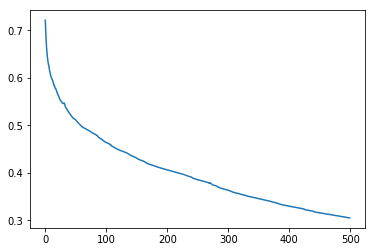

In [118]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    arr_loss = []
    for i in range(num_steps):
        sess.run(optimiser, feed_dict={X: x_train, Y: y_train})
        val = sess.run(loss, feed_dict={X: x_train, Y: y_train})
        arr_loss.append(val)
        predictions = sess.run(prediction, feed_dict={X: x_test})
        predictions_train = sess.run(prediction, feed_dict={X: x_train})

    print('F1 test: ', f1_score(y_true=y_test, y_pred=predictions))
    print('F1 train: ', f1_score(y_true=y_train, y_pred=predictions_train))

    plt.plot(arr_loss)
    plt.show()

In [119]:
# Creating model Network
def neural_netwk(x):    
    # Hidden fully connected layer with 100 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1, activation=tf.nn.sigmoid)
    # Hidden fully connected layer with 100 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2, activation=tf.nn.sigmoid)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes, activation=tf.nn.sigmoid)
    return out_layer

In [120]:
logit = neural_netwk(X)

In [121]:
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y, name='Cross_Entropy')
print(cross_entropy)

Tensor("Cross_Entropy_9:0", shape=(?, 1), dtype=float32)


In [122]:
loss = tf.reduce_mean(cross_entropy, name='Loss')
print(loss)

Tensor("Loss_9:0", shape=(), dtype=float32)


In [123]:
prediction = tf.round(tf.nn.sigmoid(logit))
print(prediction)

Tensor("Round_9:0", shape=(?, 1), dtype=float32)


In [124]:
# add an optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

F1 test:  0.5454545454545454
F1 train:  0.6440677966101694


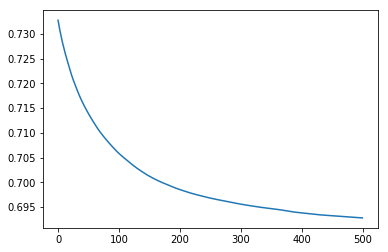

In [125]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    arr_loss = []
    for i in range(num_steps):
        sess.run(optimiser, feed_dict={X: x_train, Y: y_train})
        val = sess.run(loss, feed_dict={X: x_train, Y: y_train})
        arr_loss.append(val)
        predictions = sess.run(prediction, feed_dict={X: x_test})
        predictions_train = sess.run(prediction, feed_dict={X: x_train})

    print('F1 test: ', f1_score(y_true=y_test, y_pred=predictions))
    print('F1 train: ', f1_score(y_true=y_train, y_pred=predictions_train))

    plt.plot(arr_loss)
    plt.show()

In [126]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    knn_pred_tr = knn.predict(x_train)
    predictions = sess.run(prediction, feed_dict={X: x_test})

    print('F1 test: ', f1_score(y_true=y_test, y_pred=knn_pred))
    print('F1 train: ', f1_score(y_true=y_train, y_pred=knn_pred_tr))
    

F1 test:  0.9285714285714286
F1 train:  0.9281045751633986


/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
